In [3]:
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tensorboardX import SummaryWriter

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
])
train_dataset = torchvision.datasets.MNIST(root='data', download=False, train=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='data', download=False, train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=1)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=1)

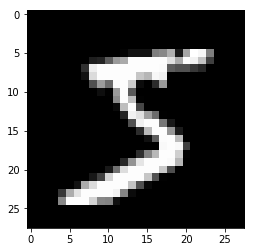

In [5]:
plt.imshow(train_dataset[0][0][0], cmap='gray')

In [6]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 1000),
            nn.ReLU(True),
            nn.Linear(1000, 1000),
            nn.ReLU(True),
            nn.Linear(1000, 2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 1000),
            nn.ReLU(True),
            nn.Linear(1000, 1000),
            nn.ReLU(True),
            nn.Linear(1000, 784),
            nn.Sigmoid()
        )
        self.D = nn.Sequential(
            nn.Linear(2, 1000),
            nn.ReLU(True),
            nn.Linear(1000, 1000),
            nn.ReLU(True),
            nn.Linear(1000, 1),
            nn.Sigmoid()
        )
        
    def forward(self, input, phase="reconstruct"):
        """
        Train an AAE has two parts, first being the reconstruction phase(train
        our autoencoder to reconstruct the input), and the regularization phase
        (first the discriminator is trained followed by the encoder)
        """
        out = self.reconstruct(input)
        return out
    
    def encode(self, input):
        out = self.encoder(input)
        return out
    
    def decode(self, input):
        out = self.decoder(input)
        return out
    
    def discriminate(self, input):
        out = self.D(input)
        return out
    
    def reconstruct(self, input):
        out = self.encode(input)
        out = self.decode(out)
        return out


In [7]:
autoencoder = AutoEncoder()
device = torch.device("cuda:0")
autoencoder = autoencoder.to(device)
reconst_criterion = nn.MSELoss()
regular_criterion = nn.BCELoss()
optimizer_reconst = optim.Adam(autoencoder.parameters(), lr=0.001, betas=(0.9, 0.999))
optimizer_D = optim.Adam(autoencoder.D.parameters(), lr=0.001)
optimizer_G = optim.Adam(autoencoder.encoder.parameters(), lr=0.001)

Epoch: 1
#0 reconst_loss: 0.0505, dc_loss_real: 0.6834, dc_loss_fake: 0.6925, dc_loss: 1.3759, g_loss: 0.6971
#50 reconst_loss: 0.0498, dc_loss_real: 0.6806, dc_loss_fake: 0.7052, dc_loss: 1.3857, g_loss: 0.6824
#100 reconst_loss: 0.0548, dc_loss_real: 0.7082, dc_loss_fake: 0.6875, dc_loss: 1.3958, g_loss: 0.6991
#150 reconst_loss: 0.0494, dc_loss_real: 0.7102, dc_loss_fake: 0.6742, dc_loss: 1.3844, g_loss: 0.7204
#200 reconst_loss: 0.0481, dc_loss_real: 0.6800, dc_loss_fake: 0.7054, dc_loss: 1.3854, g_loss: 0.6828
#250 reconst_loss: 0.0481, dc_loss_real: 0.7087, dc_loss_fake: 0.6658, dc_loss: 1.3746, g_loss: 0.7247
#300 reconst_loss: 0.0521, dc_loss_real: 0.6761, dc_loss_fake: 0.7119, dc_loss: 1.3880, g_loss: 0.6764
#350 reconst_loss: 0.0539, dc_loss_real: 0.7063, dc_loss_fake: 0.6959, dc_loss: 1.4023, g_loss: 0.6937
#400 reconst_loss: 0.0512, dc_loss_real: 0.6849, dc_loss_fake: 0.7101, dc_loss: 1.3950, g_loss: 0.6780
#450 reconst_loss: 0.0512, dc_loss_real: 0.7032, dc_loss_fake: 0.69

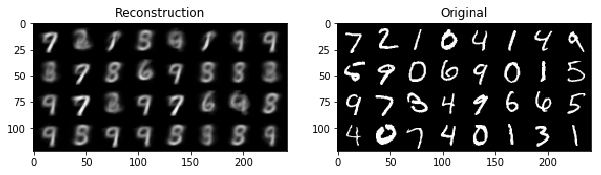

Epoch: 2
#0 reconst_loss: 0.0505, dc_loss_real: 0.7289, dc_loss_fake: 0.6608, dc_loss: 1.3897, g_loss: 0.7281
#50 reconst_loss: 0.0540, dc_loss_real: 0.7275, dc_loss_fake: 0.6346, dc_loss: 1.3621, g_loss: 0.7761
#100 reconst_loss: 0.0496, dc_loss_real: 0.6870, dc_loss_fake: 0.7101, dc_loss: 1.3971, g_loss: 0.6765
#150 reconst_loss: 0.0450, dc_loss_real: 0.6921, dc_loss_fake: 0.6996, dc_loss: 1.3917, g_loss: 0.6866
#200 reconst_loss: 0.0497, dc_loss_real: 0.7313, dc_loss_fake: 0.6295, dc_loss: 1.3608, g_loss: 0.7744
#250 reconst_loss: 0.0487, dc_loss_real: 0.6794, dc_loss_fake: 0.6940, dc_loss: 1.3734, g_loss: 0.6962
#300 reconst_loss: 0.0460, dc_loss_real: 0.6806, dc_loss_fake: 0.7004, dc_loss: 1.3810, g_loss: 0.6895
#350 reconst_loss: 0.0457, dc_loss_real: 0.7082, dc_loss_fake: 0.6685, dc_loss: 1.3767, g_loss: 0.7204
#400 reconst_loss: 0.0455, dc_loss_real: 0.6829, dc_loss_fake: 0.7036, dc_loss: 1.3865, g_loss: 0.6834
#450 reconst_loss: 0.0485, dc_loss_real: 0.7150, dc_loss_fake: 0.67

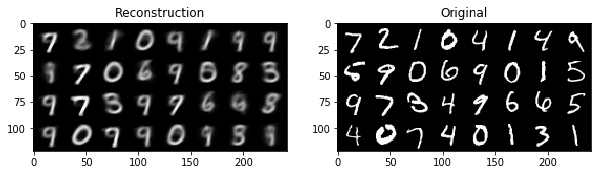

Epoch: 3
#0 reconst_loss: 0.0445, dc_loss_real: 0.7099, dc_loss_fake: 0.6798, dc_loss: 1.3897, g_loss: 0.7079
#50 reconst_loss: 0.0459, dc_loss_real: 0.6857, dc_loss_fake: 0.7003, dc_loss: 1.3860, g_loss: 0.6868
#100 reconst_loss: 0.0445, dc_loss_real: 0.6940, dc_loss_fake: 0.6889, dc_loss: 1.3829, g_loss: 0.6992
#150 reconst_loss: 0.0435, dc_loss_real: 0.6901, dc_loss_fake: 0.6940, dc_loss: 1.3841, g_loss: 0.6924
#200 reconst_loss: 0.0492, dc_loss_real: 0.7027, dc_loss_fake: 0.6746, dc_loss: 1.3773, g_loss: 0.7240
#250 reconst_loss: 0.0505, dc_loss_real: 0.7004, dc_loss_fake: 0.6924, dc_loss: 1.3929, g_loss: 0.6955
#300 reconst_loss: 0.0417, dc_loss_real: 0.6879, dc_loss_fake: 0.6964, dc_loss: 1.3844, g_loss: 0.6911
#350 reconst_loss: 0.0448, dc_loss_real: 0.6857, dc_loss_fake: 0.6977, dc_loss: 1.3834, g_loss: 0.6921
#400 reconst_loss: 0.0437, dc_loss_real: 0.7081, dc_loss_fake: 0.6956, dc_loss: 1.4036, g_loss: 0.6907
#450 reconst_loss: 0.0419, dc_loss_real: 0.6848, dc_loss_fake: 0.70

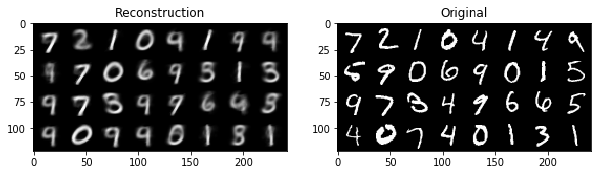

Epoch: 4
#0 reconst_loss: 0.0440, dc_loss_real: 0.7089, dc_loss_fake: 0.6706, dc_loss: 1.3795, g_loss: 0.7184
#50 reconst_loss: 0.0431, dc_loss_real: 0.6840, dc_loss_fake: 0.7025, dc_loss: 1.3866, g_loss: 0.6862
#100 reconst_loss: 0.0431, dc_loss_real: 0.6900, dc_loss_fake: 0.6928, dc_loss: 1.3828, g_loss: 0.6944
#150 reconst_loss: 0.0455, dc_loss_real: 0.6711, dc_loss_fake: 0.6730, dc_loss: 1.3442, g_loss: 0.7252
#200 reconst_loss: 0.0447, dc_loss_real: 0.6744, dc_loss_fake: 0.7078, dc_loss: 1.3821, g_loss: 0.6803
#250 reconst_loss: 0.0474, dc_loss_real: 0.6920, dc_loss_fake: 0.6923, dc_loss: 1.3843, g_loss: 0.6979
#300 reconst_loss: 0.0459, dc_loss_real: 0.6715, dc_loss_fake: 0.7076, dc_loss: 1.3791, g_loss: 0.6800
#350 reconst_loss: 0.0463, dc_loss_real: 0.6961, dc_loss_fake: 0.6917, dc_loss: 1.3878, g_loss: 0.6990
#400 reconst_loss: 0.0452, dc_loss_real: 0.6948, dc_loss_fake: 0.6881, dc_loss: 1.3829, g_loss: 0.7004
#450 reconst_loss: 0.0479, dc_loss_real: 0.6897, dc_loss_fake: 0.69

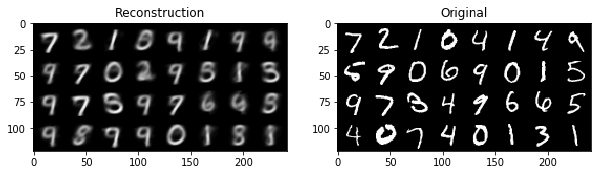

Epoch: 5
#0 reconst_loss: 0.0472, dc_loss_real: 0.7016, dc_loss_fake: 0.6927, dc_loss: 1.3943, g_loss: 0.6945
#50 reconst_loss: 0.0426, dc_loss_real: 0.6922, dc_loss_fake: 0.6930, dc_loss: 1.3852, g_loss: 0.6937
#100 reconst_loss: 0.0518, dc_loss_real: 0.6925, dc_loss_fake: 0.6948, dc_loss: 1.3873, g_loss: 0.6952
#150 reconst_loss: 0.0479, dc_loss_real: 0.6884, dc_loss_fake: 0.6910, dc_loss: 1.3794, g_loss: 0.6973
#200 reconst_loss: 0.0509, dc_loss_real: 0.6832, dc_loss_fake: 0.7081, dc_loss: 1.3914, g_loss: 0.6809
#250 reconst_loss: 0.0465, dc_loss_real: 0.7010, dc_loss_fake: 0.7060, dc_loss: 1.4070, g_loss: 0.7043
#300 reconst_loss: 0.0471, dc_loss_real: 0.7305, dc_loss_fake: 0.6490, dc_loss: 1.3795, g_loss: 0.7537
#350 reconst_loss: 0.0458, dc_loss_real: 0.6910, dc_loss_fake: 0.6936, dc_loss: 1.3846, g_loss: 0.6941
#400 reconst_loss: 0.0448, dc_loss_real: 0.6959, dc_loss_fake: 0.6953, dc_loss: 1.3912, g_loss: 0.6913
#450 reconst_loss: 0.0440, dc_loss_real: 0.6923, dc_loss_fake: 0.69

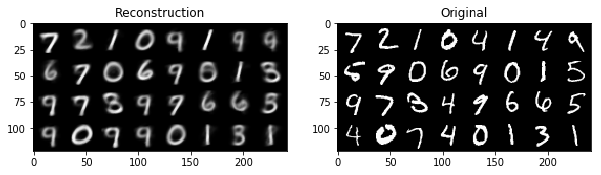

In [11]:
model = autoencoder
writer = SummaryWriter()

for epoch in range(1, 5+1):
    print("Epoch: {}".format(epoch))
    for batch_num, (input, labels) in enumerate(train_loader):
        # 3 steps:
        # 1. get reconstruction loss
        input = input.to(device)
        input = input.view(-1, 784)
        encoded = model.encode(input)
        output = model.decode(encoded)
        reconst_loss = reconst_criterion(output, input)
        optimizer_reconst.zero_grad()
        reconst_loss.backward()
        optimizer_reconst.step()
        
        # 2. train discriminator
        feat_real = torch.randn((128, 2)).to(device)
        feat_real = feat_real * 5
        feat_fake = model.encode(input)
        dc_real = model.D(feat_real)
        dc_fake = model.D(feat_fake.detach())
        dc_loss_real = regular_criterion(dc_real,
                                         torch.ones_like(dc_real).to(device))
        dc_loss_fake = regular_criterion(dc_fake,
                                         torch.zeros_like(dc_fake).to(device))
        dc_loss = dc_loss_real + dc_loss_fake
        optimizer_D.zero_grad()
        dc_loss.backward()
        optimizer_D.step()
     
        # 3. train generator(encoder)
        g_loss = regular_criterion(model.D(feat_fake), torch.ones_like(dc_fake).to(device))
        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()
        
        if batch_num % 50 == 0:
            print("#{} reconst_loss: {:.4f}".format(batch_num, reconst_loss.item()), end=', ')
            print("dc_loss_real: {:.4f}, dc_loss_fake: {:.4f}, dc_loss: {:.4f}".format(
                dc_loss_real.item(), dc_loss_fake.item(), dc_loss.item()), end=", ")
            print("g_loss: {:.4f}".format(g_loss.item()))
            writer.add_scalar('data/reconst_loss', reconst_loss.item(), 469*(epoch-1)+batch_num)
            writer.add_scalar('data/dc_loss_real', dc_loss_real.item(), 469*(epoch-1)+batch_num)
            writer.add_scalar('data/dc_loss_fake', dc_loss_fake.item(), 469*(epoch-1)+batch_num)
            writer.add_scalar('data/dc_loss', dc_loss.item(), 469*(epoch-1)+batch_num)
            writer.add_scalar('data/g_loss', g_loss.item(), 469*(epoch-1)+batch_num)
            writer.add_histogram('feat_real', feat_real.clone().cpu().data.numpy(), 469*(epoch-1)+batch_num)
            writer.add_histogram('feat_fake', feat_fake.clone().cpu().data.numpy(), 469*(epoch-1)+batch_num)
            summary_input = torchvision.utils.make_grid(input.view(-1, 1, 28, 28).clone().cpu().data)
            summary_output = torchvision.utils.make_grid(output.view(-1, 1, 28, 28).clone().cpu().data)
            writer.add_image('input', summary_input, 469*(epoch-1)+batch_num)
            writer.add_image('reconstruction', summary_output, 469*(epoch-1)+batch_num)
    
    # Show recovery
    input, _ = next(iter(test_loader))
    input = input.view(-1, 784).to(device)
    output = model(input)
    reconstructed = torchvision.utils.make_grid(output.view(-1, 1, 28, 28))
    reconstructed = reconstructed.data.cpu().numpy()
    reconstructed = reconstructed.transpose((1, 2, 0))
    reconstructed = np.clip(reconstructed, 0, 1)
    fig = plt.figure(figsize=(10, 8))
    plt.subplot(121)
    plt.imshow(reconstructed)
    plt.title('Reconstruction')
    origin = torchvision.utils.make_grid(input.view(-1, 1, 28, 28))
    origin = origin.data.cpu().numpy()
    origin = origin.transpose((1, 2, 0))
    origin = np.clip(origin, 0, 1)
    plt.subplot(122)
    plt.imshow(origin)
    plt.title('Original')
    plt.show()

# Decode from random 2 features

tensor([1.5247, 0.4535])


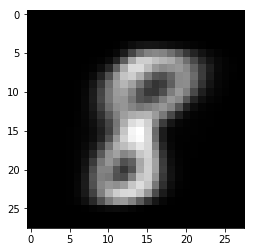

In [12]:
to_decode = torch.randn(2)
print(to_decode)
to_decode = to_decode.to(device)
output = autoencoder.decode(to_decode)
output = output.view(28, 28)
output = output.cpu().data.numpy()
plt.imshow(output, cmap='gray')
plt.show()

# see the distribution

passed values from (-10, -10) to (10, 10) at regular intervals to the decoder

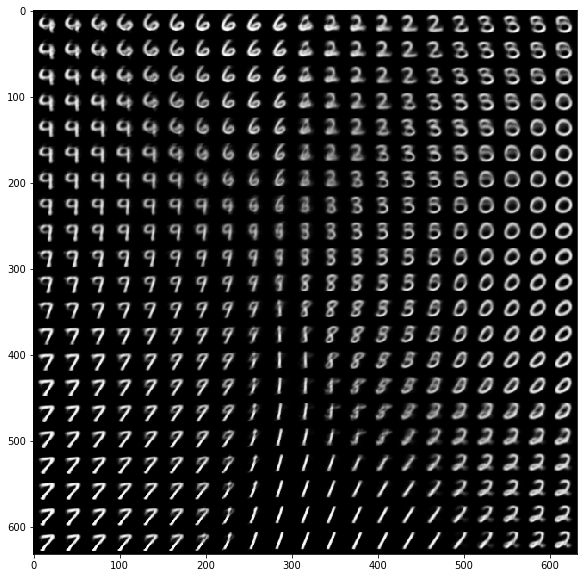

In [13]:
x = np.linspace(-10, 10, 21)
y = np.linspace(-10, 10, 21)
to_decode = []
for xv in x:
    for yv in y:
        to_decode.append((xv, yv))
to_decode = torch.tensor(to_decode)
to_decode = to_decode.to(device)
output = autoencoder.decode(to_decode)
output = output.view(-1, 1, 28, 28)
show = torchvision.utils.make_grid(output, nrow=21)
show = show.cpu().data.numpy()
show = show.transpose((1, 2, 0))

figure = plt.figure(figsize=(10, 10))
plt.imshow(show)
plt.show()

# Reference

* https://towardsdatascience.com/a-wizards-guide-to-adversarial-autoencoders-part-2-exploring-latent-space-with-adversarial-2d53a6f8a4f9